# Research on the telecom operator Megaline clients' behaviour

The telecom operator Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.

A preliminary analysis of the plans will be based on a relatively small client selection: 500 Megaline clients (who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018). We'll analyze clients' behavior and determine which prepaid plan is more profitable.


### Step 1. Openning the data file and studying the general information. 

In [1]:
#We have 5 tebales in our work, let’s read them from the csv and check what we have there.
#1st table from the csv file will be saved as calls:

import pandas as pd
import numpy as np 
import math as mt
from math import factorial
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st


from collections import Counter
        

calls = pd.read_csv('/datasets/megaline_calls.csv', sep=',')
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [2]:
#2nd table from the csv file will be saved as internet:

internet = pd.read_csv('/datasets/megaline_internet.csv', sep=',')
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [3]:
#3rd table from the csv file will be saved as messages:

messages = pd.read_csv('/datasets/megaline_messages.csv', sep=',')
messages.info()
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [4]:
#4th table from the csv file will be saved as plans:

plans = pd.read_csv('/datasets/megaline_plans.csv', sep=',')
plans.info()
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
#5th table from the csv file will be saved as users:

users = pd.read_csv('/datasets/megaline_users.csv', sep=',')
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [6]:
display(
    plans.head(),
    users.head(),
    messages.head(),
    internet.head(),
    calls.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Conclusion

There are 5 data sets. Every data set is saved as a variable:
1. **plans**

Its total length is 2 rows, every row represents one plan and their characteristics in columns: how many messages - messages_included; how much data (in megabytes) - mb_per_month_included; calls - minutes_included; price in USD - usd_monthly_pay; price per extra Gb of data after exceeding the package limits (1 GB = 1024 megabytes) - usd_per_gb; price per sms after exceeding the package limits - usd_per_message; price per call/min after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged) - usd_per_minute; plan -	plan_name. 


2. **users**

Its total length is 500 rows, every row represents one user and their characteristics in columns: unique user identifier - user_id; name - first_name, last_name; user's age (years) - age; user's city of residence - city; subscription date (dd, mm, yy) - reg_date; plan - tariff; the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated) - churn_date.


3. **internet**

Its total length is 104825 rows, every row represents unique session, and its characteristics in columns: unique session identifier - id; the identifier of the user using the data -	user_id; web session date - session_date; the volume of data spent during the session (in megabytes) - mb_used.


4. **calls**

Its total length is 137735 rows, every row represents unique call, and and its characteristics in columns: unique call identifier - id; the identifier of the user making the call - user_id; call date - call_date; call duration (in minutes) -	duration.


5. **messages**

Its total length is 76051 rows, every row represents unique text message, and and its characteristics in columns: unique text message identifier - id; 	the identifier of the user sending the text - user_id; text message date -	message_date. 

Let's see the quality of the data, for example whether there are missing values and other peculiarities.

### Step 2. Data preprocessing

In [7]:
#Let's check what data types we have in our tables and convert to the necessary types if needed:
# for all tables where presents:
#user_id - from integer to string format
calls['user_id'] = (calls['user_id']).apply(str)
internet['user_id'] = (internet['user_id']).apply(str)
messages['user_id'] = (messages['user_id']).apply(str)
users['user_id'] = (users['user_id']).apply(str)

#for other tables as follows:

#calls:
#call_date - from string to data format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

#internet:
#session_date - from string to data format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

#messages:
#message_date - from string to data format
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

#users:
#reg_date, churn_date - from string to data format 
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')


In [8]:
#Let's check data quality 
#by counting values
#by by counting null values

#calls:
calls.query('duration == 0').groupby(['user_id','duration']).size()
#478 users had call duration of 0.0 min, that represents significant part (96%) of our 500 users and 19% of total calls
print(len(calls.query('duration == 0'))/len(calls['id']))
#so let's place this data into separate group in order to check it further later on
zero_calls = calls.query('duration == 0')
#so let's place non zero data into separate group in order to check it further as well
nonzero_calls = calls.query('duration != 0')
#nonzero_calls.head()
#nonzero_calls.duration.hist()
#zero_calls['duration'].value_counts().head(10)
#zero_calls.hist()
#zero_calls['user_id'].value_counts()


0.1948233927469416


In [9]:
#internet:
#internet.hist()
zero_internet = internet.query('mb_used == 0')
internet.query('mb_used == 0').groupby(['user_id','mb_used']).size()
#477 users had internet of 0.0 mb_used, that represents significant part (95%) of our 500 users and 13% of total internet
print(len(internet.query('mb_used == 0'))/len(internet['id']))
#so let's place this data into separate group in order to check it further later on
zero_internet = internet.query('mb_used == 0')
#so let's place non zero data into separate group in order to check it further as well
nonzero_internet = internet.query('mb_used != 0')

#zero_internet['user_id'].value_counts()


0.1311423801574052


In [10]:
#In order to find:
#The number of calls made and minutes used per month
#The number of text messages sent per month
#The volume of data per month

#First, let's create a new columns 'month' in our tables: internet, calls, messages
calls['month'] = (calls['call_date']).dt.month 
internet['month'] = (internet['session_date']).dt.month 
messages['month'] = (messages['message_date']).dt.month 
internet.head()

#Second, let's create a table that will consist of number of calls/sessions/messages and their sum for each user

internet_per_mnth = internet.groupby(['user_id', 'month'])['mb_used'].sum()

calls_per_mnth = calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum'])

messages_per_mnth = messages.groupby(['user_id', 'month'])['id'].count()

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
#Let's merge above in one table:

profit1 = pd.merge(left=internet_per_mnth,right=calls_per_mnth,how='outer',on=['user_id','month']).fillna(0)
profit2 = pd.merge(left=profit1,right=messages_per_mnth,how='outer',on=['user_id','month']).fillna(0)
profit2.columns = ['data','calls','calls_time','messages']
users_plans1 = users[['user_id','plan']]


In [16]:
users_plans1.columns = ['user_id', 'plan_name']
users_plans = pd.merge(left=users_plans1,right=plans,how='outer',on='plan_name')

profit = pd.merge(left=profit2.reset_index() ,right=users_plans,how='outer',on=['user_id'])
profit.reset_index()
profit.tail(20)

,user_id,month,data,calls,calls_time,messages,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
2283,1499,11.0,16813.83,45.0,288.56,0.0,surf,50,15360,500,20,10,0.03,0.03
2284,1499,12.0,22059.21,65.0,468.10,0.0,surf,50,15360,500,20,10,0.03,0.03
2285,1470,5.0,0.00,28.0,228.84,51.0,surf,50,15360,500,20,10,0.03,0.03
2286,1470,6.0,0.00,72.0,534.94,133.0,surf,50,15360,500,20,10,0.03,0.03
2287,1470,7.0,0.00,75.0,488.40,147.0,surf,50,15360,500,20,10,0.03,0.03
2288,1470,8.0,0.00,84.0,547.38,141.0,surf,50,15360,500,20,10,0.03,0.03
2289,1470,9.0,0.00,70.0,441.96,130.0,surf,50,15360,500,20,10,0.03,0.03
2290,1470,10.0,0.00,72.0,434.68,145.0,surf,50,15360,500,20,10,0.03,0.03
2291,1470,11.0,0.00,81.0,602.30,156.0,surf,50,15360,500,20,10,0.03,0.03
2292,1470,12.0,0.00,78.0,560.44,153.0,surf,50,15360,500,20,10,0.03,0.03


In [18]:
#let's check if there is any user activity before the registration date and past the churn date:

users_plans10 = users[['user_id','reg_date', 'churn_date','plan']]
users_plans10.columns = ['user_id', 'reg_date', 'churn_date','plan_name']

calls_dates=calls[['user_id', 'call_date']]
calls_dates.columns=['user_id', 'call_date']
calls_dates = calls_dates.drop_duplicates().reset_index(drop=True)
#calls_dates.info()
#calls.info()

int_dates=internet[['user_id', 'session_date']]
int_dates.columns=['user_id', 'session_date']
int_dates = int_dates.drop_duplicates().reset_index(drop=True)
#int_dates.info()
#internet.info()

msg_dates=messages[['user_id', 'message_date']]
msg_dates.columns=['user_id', 'message_date']
msg_dates = msg_dates.drop_duplicates().reset_index(drop=True)
#msg_dates.info()
#messages.info()


#let's check if in calls/messages/internet tables were users used the service when it was over/not yet on:
outOfService_profit_calls = pd.merge(
    left=users_plans10 ,right=calls_dates,how='outer',on=['user_id']).reset_index(drop=True)
#outOfService_profit_calls.info()
outOfService_profit_calls['churn_date'] = pd.to_datetime(outOfService_profit_calls['churn_date'], errors='coerce')

outOfService_profit_calls=outOfService_profit_calls.query('reg_date > call_date or call_date > churn_date')
#outOfService_profit_calls.info()
#There are 30 users who called after the churn date or before the registration date
#outOfService_profit_calls.describe()

outOfService_profit_msg = pd.merge(
    left=users_plans10 ,right=msg_dates,how='outer',on=['user_id']).reset_index(drop=True)
#outOfService_profit_msg.info()
outOfService_profit_msg['churn_date'] = pd.to_datetime(outOfService_profit_msg['churn_date'], errors='coerce')

outOfService_profit_msg=outOfService_profit_msg.query('reg_date > message_date or message_date > churn_date')
#outOfService_profit_msg.info()

#There are 23 users who sent messages after the churn date or before the registration date
#outOfService_profit_msg.describe()

outOfService_profit_int = pd.merge(left=users_plans10 ,right=int_dates,how='outer',on=['user_id']).reset_index(drop=True)
#outOfService_profit_int.info()
outOfService_profit_int['churn_date'] = pd.to_datetime(outOfService_profit_int['churn_date'], errors='coerce')

outOfService_profit_int=outOfService_profit_int.query('reg_date > session_date or session_date > churn_date')
#outOfService_profit_int.info()

#There are 30 users who used internet after the churn date or before the registration date
outOfService_profit_int.describe()

outOfService_profit10 = pd.merge(
    left=outOfService_profit_int ,right=outOfService_profit_msg,how='outer',on=['user_id']).reset_index(drop=True)
outOfService_profit10 = outOfService_profit10.drop_duplicates().reset_index(drop=True)
outOfService_profit20 = pd.merge(
    left=outOfService_profit10 ,right=outOfService_profit_calls,how='outer',on=['user_id']).reset_index(drop=True)
outOfService_profit20 = outOfService_profit20.drop_duplicates().reset_index(drop=True)

outOfService_profit20 = outOfService_profit20[['user_id','reg_date','churn_date','plan_name','session_date','message_date', 'call_date']]
#outOfService_profit.tail(20)

#outOfService_profit20.describe()


outOfService_profit20.pivot_table(
    index=('user_id','reg_date','churn_date','plan_name'), 
    values= ('session_date','message_date', 'call_date'), 
    aggfunc=['count']
).head()
#In total there are 30 users who used the service after the churn date or before the registration date

count                          
                                        call_date message_date session_date
user_id reg_date   churn_date plan_name                                    
1006    2018-11-27 2018-12-18 ultimate        286          286          286
1012    2018-06-28 2018-11-16 surf            480            0          480
1022    2018-04-20 2018-09-07 surf          10700            0        10700
1040    2018-12-23 2018-12-30 surf              1            0            1
1050    2018-03-20 2018-10-07 ultimate       5256            0         5256

In [19]:
#Let's calculate extra text/minutes/data used:

profit['extra_txt'] = (profit['messages'] - profit['messages_included'])
profit['extra_txt'] = np.where(profit['extra_txt']<0, 0, profit['extra_txt']) 

profit['extra_min'] = (profit['calls_time'] - profit['minutes_included'])
profit['extra_min'] = np.where(profit['extra_min']<0, 0, profit['extra_min']) 

profit['extra_Mb'] = (profit['data'] - profit['mb_per_month_included'])
profit['extra_Mb'] = np.where(profit['extra_Mb']<0, 0, profit['extra_Mb']) 

#print(profit)

In [20]:
#let's round up the extra_Mb column:
profit['extra_Gb'] = np.ceil(profit['extra_Mb']/1024) 
 
profit.tail(20)

,user_id,month,data,calls,calls_time,messages,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_txt,extra_min,extra_Mb,extra_Gb
2283,1499,11.0,16813.83,45.0,288.56,0.0,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,1453.83,2.0
2284,1499,12.0,22059.21,65.0,468.10,0.0,surf,50,15360,500,20,10,0.03,0.03,0.0,0.00,6699.21,7.0
2285,1470,5.0,0.00,28.0,228.84,51.0,surf,50,15360,500,20,10,0.03,0.03,1.0,0.00,0.00,0.0
2286,1470,6.0,0.00,72.0,534.94,133.0,surf,50,15360,500,20,10,0.03,0.03,83.0,34.94,0.00,0.0
2287,1470,7.0,0.00,75.0,488.40,147.0,surf,50,15360,500,20,10,0.03,0.03,97.0,0.00,0.00,0.0
2288,1470,8.0,0.00,84.0,547.38,141.0,surf,50,15360,500,20,10,0.03,0.03,91.0,47.38,0.00,0.0
2289,1470,9.0,0.00,70.0,441.96,130.0,surf,50,15360,500,20,10,0.03,0.03,80.0,0.00,0.00,0.0
2290,1470,10.0,0.00,72.0,434.68,145.0,surf,50,15360,500,20,10,0.03,0.03,95.0,0.00,0.00,0.0
2291,1470,11.0,0.00,81.0,602.30,156.0,surf,50,15360,500,20,10,0.03,0.03,106.0,102.30,0.00,0.0
2292,1470,12.0,0.00,78.0,560.44,153.0,surf,50,15360,500,20,10,0.03,0.03,103.0,60.44,0.00,0.0


In [21]:
#Let's calculate total cost per month:

profit['total_cost'] = (
    profit['usd_monthly_pay'] + 
    profit['extra_min'] * profit['usd_per_minute'] + 
    profit['extra_txt'] * profit['usd_per_message'] + profit['extra_Gb'] * profit['usd_per_gb'] 
)
print(profit.tail(20))

     user_id  month      data  calls  calls_time  messages plan_name  \
2283    1499   11.0  16813.83   45.0      288.56       0.0      surf   
2284    1499   12.0  22059.21   65.0      468.10       0.0      surf   
2285    1470    5.0      0.00   28.0      228.84      51.0      surf   
2286    1470    6.0      0.00   72.0      534.94     133.0      surf   
2287    1470    7.0      0.00   75.0      488.40     147.0      surf   
2288    1470    8.0      0.00   84.0      547.38     141.0      surf   
2289    1470    9.0      0.00   70.0      441.96     130.0      surf   
2290    1470   10.0      0.00   72.0      434.68     145.0      surf   
2291    1470   11.0      0.00   81.0      602.30     156.0      surf   
2292    1470   12.0      0.00   78.0      560.44     153.0      surf   
2293    1025    NaN       NaN    NaN         NaN       NaN  ultimate   
2294    1269    NaN       NaN    NaN         NaN       NaN  ultimate   
2295    1275    NaN       NaN    NaN         NaN       NaN  ulti

### Conclusion

As part of the data preprocessing, we converted the data to the necessary types as follows: 
- for all tables:
    - user_id - from integer to string format
- for other tables as follows:
    - calls:
        - call_date - from string to data format
        - user_id - from integer to string format
    - internet:
        - session_date - from string to data format
    - messages:
        - message_date - from string to data format
    - users:
        - reg_date, churn_date - from string to data format 

In 'call' table 478 users had call duration of 0.0 min, that represents 19% of total amount of calls. Thus, the data was placed into a new table 'zero_calls' for further investigation. 

In 'internet' table 477 users had internet session of 0.0 mb_used, that represents 13% of total amount of internet entries. Thus, the data was placed into a new table 'zero_internet' for further investigation. 

In both cases, there is no carrelation in dates or in specific users for whom calls/data were not registered. It's recommended to raise a defect to the development team for further investigation. Before that, we'll try to investifate of there is a correlation with the plan.

We created a merged our data into one table 'profit' that shows following data per user per month: 
- what was used defacto:
    - data, calls,  calls_time  messages 
- plan_name and what is included:
    - messages_included, mb_per_month_included, minutes_included
- prices for extra consumption:
    - usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute
- how much extra consumption was during the period:
    - extra_min, extra_txt, extra_Mb
- final total cost per month: total_cost (extra + monthly fee)


### Step 3. Analyze the data

In [22]:
#Below we'll describe the customers' behavior: 
#Find the minutes, texts, and volume of data the users of each plan require per month. 
#Calculate the mean, dispersion, and standard deviation. 
#Plot histograms. 
#Describe the distributions.

profit.query('plan_name == "ultimate"').user_id.value_counts()
profit.query('plan_name == "surf"').user_id.value_counts()

#there are 339 surf plan users and 161 ultimate plan users
#***Note: for 10 users there is no data for any of consumption, 
#this represents 2% of total users (6 surf plan, 4 ultimate plan) - they will be out of the data below


1362    12
1042    12
1359    11
1408    11
1171    11
        ..
1168     1
1024     1
1342     1
1034     1
1208     1
Name: user_id, Length: 339, dtype: int64

In [23]:
profit.query('plan_name == "surf"').describe()

#Let's take a look on our table with, all data is per user per month per plan:

### SURF plan customers' behavior:
## 1573 entries

##-data: 
##--the average mobile data consumption is 16Gb (16558Mb), the standard deviation is ~8Gb, 
##--median is 16.4Gb (16829Mb) that is close to mean value and the maximum is 69Gb (70932Mb)

##-calls:
##--the average call duration per month is 404 min (almost 7 hours), the standard deviation is 222 min, 
##--median is 402 imn that is close to mean value and the maximum is 1431 min that is almost 24 hours

##-messages:
##--the average message number per month is 31, the standard deviation is 34, 
##--median is 24 and the maximum is 266

#We can see that the dispersion is smooth in data and call_time and less homogenic in messages

,month,data,calls,calls_time,messages,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_txt,extra_min,extra_Mb,extra_Gb,total_cost
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1579.0,1579.0,1579.0,1579.0,1579.0,1.579000e+03,1.579000e+03,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,9.182454,16558.283490,59.811825,404.762390,31.159568,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,7.012715,48.823598,3647.354336,3.865226,60.327346
std,2.468199,8013.513327,32.017989,221.664397,33.566717,0.0,0.0,0.0,0.0,0.0,1.388218e-17,1.388218e-17,19.470891,110.068281,5419.664587,5.445627,55.262605
min,1.000000,0.000000,0.000000,0.000000,0.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,0.000000,0.000000,0.000000,0.000000,20.000000
25%,8.000000,11986.520000,39.000000,255.470000,3.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,0.000000,0.000000,0.000000,0.000000,20.000000
50%,10.000000,16829.310000,60.000000,401.760000,24.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,0.000000,0.000000,1469.310000,2.000000,40.150000
75%,11.000000,20999.610000,79.000000,543.680000,47.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,0.000000,43.680000,5639.610000,6.000000,80.000000
max,12.000000,70931.590000,205.000000,1431.220000,266.000000,50.0,15360.0,500.0,20.0,10.0,3.000000e-02,3.000000e-02,216.000000,931.220000,55571.590000,55.000000,588.637200


In [24]:
print('Surf plan profit:', profit.query('plan_name == "surf"')['total_cost'].sum())
print('Ultimate plan profit:', profit.query('plan_name == "ultimate"')['total_cost'].sum())


Surf plan profit: 94894.91560000001
Ultimate plan profit: 52066.0


In [25]:
profit.query('plan_name == "ultimate"').describe()

### ULTIMATE plan customers' behavior:
## 720 entries

##-data: 
##--the average mobile data consumption is 17Gb (17214Mb), the standard deviation is ~8Gb, 
##--median is 16.4Gb (16858Mb) that is close to mean value and the maximum is 46Gb (46595Mb)

##-calls:
##--the average call duration per month is 406 min (almost 7 hours), the standard deviation is 227 min, 
##--median is 398 min that is close to mean value and the maximum is 1292 min that is about 21h30min

##-messages:
##--the average message number per month is 38, the standard deviation is 35, 
##--median is 30 and the maximum is 166

#We can see that the dispersion is smooth in data and call_time and less homogenic in messages

,month,data,calls,calls_time,messages,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_txt,extra_min,extra_Mb,extra_Gb,total_cost
count,720.000000,720.000000,720.000000,720.000000,720.000000,724.0,724.0,724.0,724.0,724.0,7.240000e+02,7.240000e+02,720.0,720.0,720.000000,720.000000,720.000000
mean,9.151389,17214.699694,60.626389,406.193083,37.551389,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,309.552222,0.330556,72.313889
std,2.558495,7851.897435,33.242994,227.246499,34.767179,0.0,0.0,0.0,0.0,0.0,1.735923e-18,1.735923e-18,0.0,0.0,1575.328576,1.627873,11.395108
min,1.000000,0.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.000000,70.000000
25%,8.000000,12666.955000,36.000000,246.290000,7.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.000000,70.000000
50%,10.000000,16858.340000,61.000000,398.585000,30.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.000000,70.000000
75%,11.000000,21014.527500,80.000000,532.227500,61.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,0.000000,0.000000,70.000000
max,12.000000,46595.330000,191.000000,1292.090000,166.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,0.0,0.0,15875.330000,16.000000,182.000000


In [26]:
#Let's check now variance and standard deviation:
#For SURF plan
profit.query('plan_name == "surf"').var()


month                    6.092007e+00
data                     6.421640e+07
calls                    1.025152e+03
calls_time               4.913510e+04
messages                 1.126725e+03
messages_included        0.000000e+00
mb_per_month_included    0.000000e+00
minutes_included         0.000000e+00
usd_monthly_pay          0.000000e+00
usd_per_gb               0.000000e+00
usd_per_message          4.302484e-31
usd_per_minute           4.302484e-31
extra_txt                3.791156e+02
extra_min                1.211503e+04
extra_Mb                 2.937276e+07
extra_Gb                 2.965485e+01
total_cost               3.053955e+03
dtype: float64

In [27]:
#For ULTIMATE plan
profit.query('plan_name == "ultimate"').var()


month                    6.545895e+00
data                     6.165229e+07
calls                    1.105097e+03
calls_time               5.164097e+04
messages                 1.208757e+03
messages_included        0.000000e+00
mb_per_month_included    0.000000e+00
minutes_included         0.000000e+00
usd_monthly_pay          0.000000e+00
usd_per_gb               0.000000e+00
usd_per_message          2.333598e-32
usd_per_minute           2.333598e-32
extra_txt                0.000000e+00
extra_min                0.000000e+00
extra_Mb                 2.481660e+06
extra_Gb                 2.649969e+00
total_cost               1.298485e+02
dtype: float64

In [28]:
profit_call_data_txt = profit.pivot_table(index=('month','plan_name'), values= ('calls_time', 'data', 'messages', ), aggfunc=['sum','count','median','mean','std','var'])
profit_call_data_txt.columns=['sum_minutes','sum_Mb','sum_messages','count_minutes','count_Mb','count_messages','median_minutes','median_Mb','median_messages','avg_minutes','avg_Mb','avg_messages', 'std_minutes','std_Mb','std_messages','var_minutes','var_Mb','var_messages']
print(profit_call_data_txt.sort_values(by='sum_Mb'))

                 sum_minutes      sum_Mb  sum_messages  count_minutes  \
month plan_name                                                         
1.0   surf            385.68     9749.72          21.0              2   
      ultimate        732.65    27672.37          62.0              4   
2.0   surf           2527.66   109609.59         108.0              9   
      ultimate       2659.03   119901.66         151.0              7   
3.0   ultimate       3428.42   219858.22         243.0             12   
      surf           7152.31   306945.12         351.0             23   
4.0   ultimate       6646.67   338554.75         463.0             21   
5.0   ultimate      11126.28   482109.99         931.0             29   
4.0   surf          16619.00   599210.15         870.0             50   
6.0   ultimate      16441.12   720882.29        1379.0             47   
7.0   ultimate      23822.27   964339.92        1937.0             59   
5.0   surf          29033.10  1073099.33        184

In [29]:
#We can see that highest volume of mobile data, messages and minutes is required by the surf plan users in December 
#- 5.6Tb, 2381 hours of calls and 12275 messages. 
#The minimum will be required by the same surf plan users but in January.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85a0581350>,
      dtype=object)

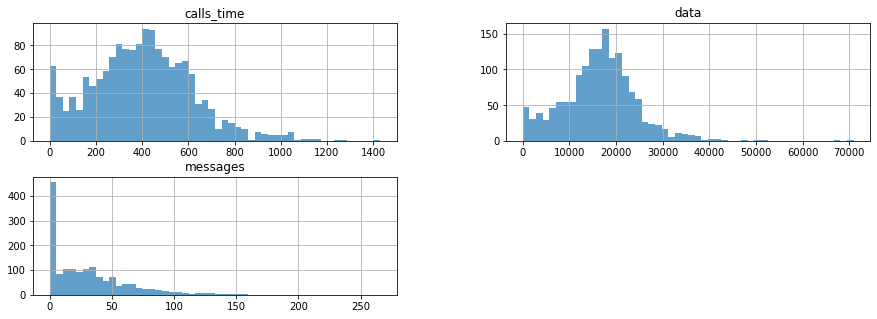

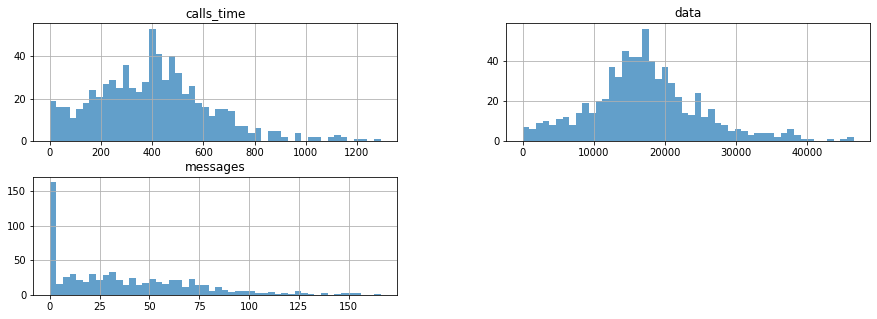

In [30]:
#profit_call_data_txt.plot(kind='hist', y='calls_time', histtype='step', range=(0, 1000000), bins=25, linewidth=5, alpha=0.7, label='filtered', ax=ax, grid=True, legend=True)
profit.query('plan_name == "surf"').hist(column=['calls_time', 'data', 'messages'], bins = 50, alpha=0.7, grid=True, figsize = (15,5), label = 'surf')

profit.query('plan_name == "ultimate"').hist(column=['calls_time', 'data', 'messages'], bins = 50, alpha=0.7, grid=True, figsize = (15,5))


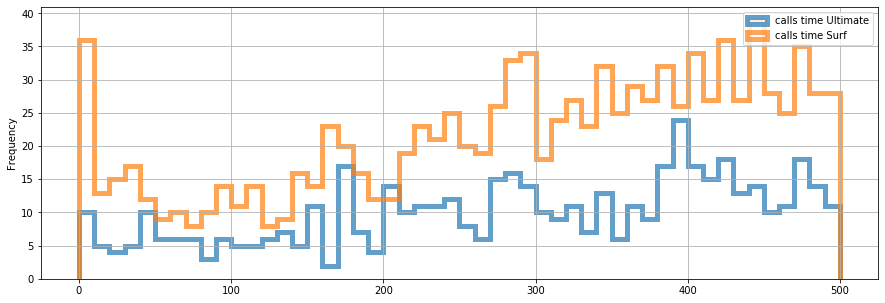

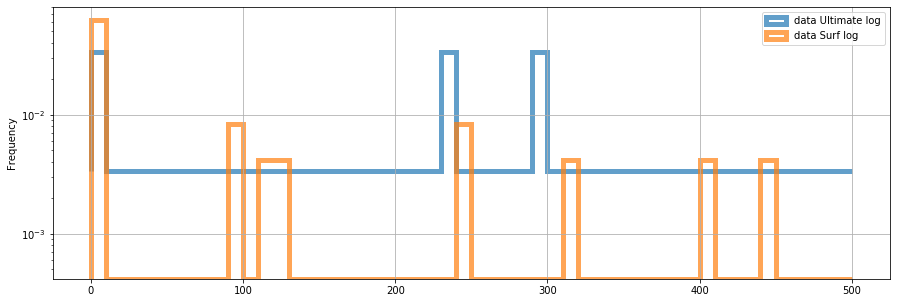

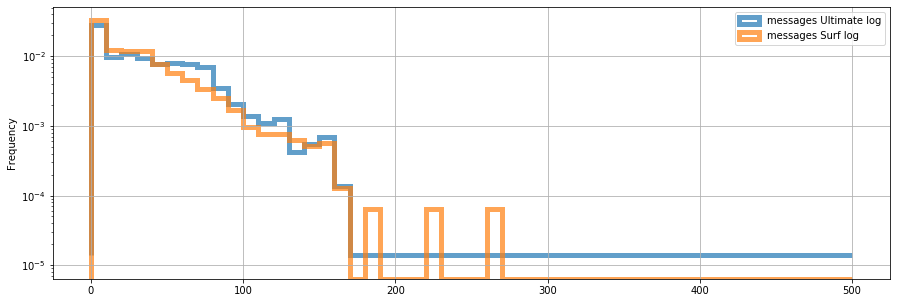

In [31]:
surf=profit.query('plan_name == "surf"')
ultimate=profit.query('plan_name == "ultimate"')

ax = ultimate.plot(
    kind='hist', y='calls_time', histtype='step', range=(0, 500), figsize = (15,5),
    bins=50, linewidth=5, alpha=0.7, label='calls time Ultimate'
)
surf.plot(
    kind='hist', y='calls_time', histtype='step', range=(0, 500), figsize = (15,5),
    bins=50, linewidth=5, alpha=0.7, label='calls time Surf', ax=ax, grid=True, 
    legend=True
)

ax = ultimate.plot(
    kind='hist', y='data', histtype='step', range=(0, 500), figsize = (15,5),
    bins=50, linewidth=5, alpha=0.7, label='data Ultimate log', density = True, log = True
)
surf.plot(
    kind='hist', y='data', histtype='step', range=(0, 500),  figsize = (15,5),
    bins=50, linewidth=5, alpha=0.7, label='data Surf log', ax=ax, grid=True, 
    legend=True, density = True, log = True
)

ax = ultimate.plot(
    kind='hist', y='messages', histtype='step', range=(0, 500), figsize = (15,5),
    bins=50, linewidth=5, alpha=0.7, label='messages Ultimate log', density = True, log = True
)
surf.plot(
    kind='hist', y='messages', histtype='step', range=(0, 500), figsize = (15,5),
    bins=50, linewidth=5, alpha=0.7, label='messages Surf log', ax=ax, grid=True, 
    legend=True, density = True, log = True
)


In [32]:
#We can see that 'messages' consumption for ultimate plan is distributed more homogenous than the surf plan
#between 1 and 75 with outliers up to 180.
#Both plans have a spike at 0, that confirms our previous analysis that it this defect should 
#be addressed to developers team.

#Call duration for both surf and ultomate plans users has a spike around 400 min, while it's more smooth for surf users

#Data histogram has a spike around 17000 for both plan users while surf users have outliers around 70000 Mb


### Conclusion

In this part we described the customers' found the minutes, texts, and volume of data the users of each plan require per month; calculated the mean, dispersion, and standard deviation and more.

We found out following behaviour for SURF plan users:
- data: 
    - the average mobile data consumption is 16Gb (16558Mb), the standard deviation is ~8Gb, 
    - median is 16.4Gb (16829Mb) that is close to mean value and the maximum is 69Gb (70932Mb)
- calls:
    - the average call duration per month is 404 min (almost 7 hours), the standard deviation is 222 min, 
    - median is 402 imn that is close to mean value and the maximum is 1431 min that is almost 24 hours
- messages:
    - the average message number per month is 31, the standard deviation is 34, 
    - median is 24 and the maximum is 266

ULTIMATE plan users' behavior:
- data: 
    - the average mobile data consumption is 17Gb (17214Mb), the standard deviation is ~8Gb, 
    - median is 16.4Gb (16858Mb) that is close to mean value and the maximum is 46Gb (46595Mb)

- calls:
    - the average call duration per month is 406 min (almost 7 hours), the standard deviation is 227 min, 
    - median is 398 min that is close to mean value and the maximum is 1292 min that is about 21h30min
- messages:
    - the average message number per month is 38, the standard deviation is 35, 
    - median is 30 and the maximum is 166

The dispersion is smooth in data and call_time and less homogenic in messages.

We found that the highest volume of mobile data, messages and minutes is required by the surf plan users in December 
- 5.6Tb, 2381 hours of calls and 12275 messages. While the minimum is required by the same surf plan users but in January.

In addition, 'messages' consumption for ultimate plan is distributed more homogenous than the surf plan between 1 and 75 with outliers up to 180. Both plans have a spike at 0, that confirms our previous analysis that it this defect should be addressed to developers team.
Call duration for both surf and ultomate plans users has a spike around 400 min, while it's more smooth for surf users
Data histogram has a spike around 17000 for both plan users while surf users have outliers around 70000 Mb.

We saw that there are 339 surf plan users and 161 ultimate plan users
Note: for 10 users there is no data for any of consumption, this represents 2% of total users (6 surf plan, 4 ultimate plan).



### Step 4. Test the hypotheses

In [33]:
#Below we will fing how the average profit from users of Ultimate and Surf calling plans differs.
#and whether the average profit from users in NY and NJ area is different from that of the users from other regions.

In [34]:
#Let's create a table that contains the users' address:
users_plans2 = users[['user_id','city']]
users_plans2.columns = ['user_id', 'city']
region_profit = pd.merge(left=users_plans2,right=profit,how='outer',on='user_id')

print(region_profit)

     user_id                                       city  month      data  \
0       1000      Atlanta-Sandy Springs-Roswell, GA MSA   12.0   1901.47   
1       1001            Seattle-Tacoma-Bellevue, WA MSA    8.0   6919.15   
2       1001            Seattle-Tacoma-Bellevue, WA MSA    9.0  13314.82   
3       1001            Seattle-Tacoma-Bellevue, WA MSA   10.0  22330.49   
4       1001            Seattle-Tacoma-Bellevue, WA MSA   11.0  18504.30   
...      ...                                        ...    ...       ...   
2298    1498  New York-Newark-Jersey City, NY-NJ-PA MSA   12.0  23137.69   
2299    1499          Orlando-Kissimmee-Sanford, FL MSA    9.0  12984.76   
2300    1499          Orlando-Kissimmee-Sanford, FL MSA   10.0  19492.43   
2301    1499          Orlando-Kissimmee-Sanford, FL MSA   11.0  16813.83   
2302    1499          Orlando-Kissimmee-Sanford, FL MSA   12.0  22059.21   

      calls  calls_time  messages plan_name  messages_included  \
0      16.0      116.

In [35]:
#Let's see what regions do we have:
region_profit["city"].value_counts()

#Now we'll set up our regions in 2 groups: NY-NJ-PA MSA and Other

New York-Newark-Jersey City, NY-NJ-PA MSA          378
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 89
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
El Paso, TX MSA                                      2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

In [36]:
#Let's check how the average profit from users in NY and NJ area is different from that of the users from other regions
#First, let's group our usres into two groups "NY_NJ_group" and "Other"

def state_group(row):
    state = row['city']
    
    if state == "New York-Newark-Jersey City, NY-NJ-PA MSA":
        return 'NY_NJ_group'
    return 'Other'
region_profit['state_group'] = region_profit.apply(state_group, axis = 1)
#region_profit['state_group'].value_counts()
#Then, let's check the pivot table per month per state group:   
group_region_profit_mean=region_profit.pivot_table(
    index=('month','state_group'),
    values = ('total_cost', 'calls_time', 'data','messages','extra_Gb','extra_min','extra_txt'),
    aggfunc='mean').sort_values(by='total_cost', ascending=False)
print(group_region_profit_mean.T)

#We can see that the highest average total cost, data, text and minutes consumption is in 'Other' region than NY_NJ in December
#The lowest average is in January in NY NJ state group.

month                12.0          10.0          8.0           7.0   \
state_group         Other   NY_NJ_group         Other         Other   
calls_time     446.586896    452.312642    390.657500    422.951156   
data         18367.520636  18521.042642  17054.512240  16808.914830   
extra_Gb         3.450382      3.905660      3.062500      2.850340   
extra_min       46.812697     51.767547     30.417396     41.585578   
extra_txt        7.521628      4.113208      4.734375      3.952381   
messages        41.475827     29.905660     33.364583     30.653061   
total_cost      72.469724     68.714158     68.247261     68.073622   

month                10.0          11.0          12.0          9.0   \
state_group         Other   NY_NJ_group   NY_NJ_group         Other   
calls_time     404.290793    411.436290    423.334079    394.666567   
data         17200.351069  17391.425645  17295.942368  16544.845794   
extra_Gb         2.951724      3.467742      3.052632      2.532189   
extra

In [37]:
#Now let's check the average profit from users of Ultimate and Surf calling plans differs:

group_plan_profit_mean=region_profit.pivot_table(index=('month','plan_name'),aggfunc='mean').sort_values(by='month', ascending=False)
print(group_plan_profit_mean)

#While checking the plan, we can see that the highest average total cost is in March for ultimate plan user
#The highest average data consumption is in December by the ultimate plan user (very close to this of March)


                     calls  calls_time          data  extra_Gb     extra_Mb  \
month plan_name                                                               
12.0  ultimate   64.900662  433.012583  18323.191854  0.470199   445.544503   
      surf       65.452830  447.475283  18132.469371  4.770440  4501.746384   
11.0  ultimate   62.362205  420.477559  17033.685354  0.244094   234.233228   
      surf       59.120141  399.599823  16339.254417  3.604240  3414.596254   
10.0  ultimate   63.783019  425.168019  17612.553396  0.330189   305.984245   
      surf       60.350211  405.692363  17311.335063  4.337553  4093.469747   
9.0   ultimate   61.046512  413.287326  16969.869535  0.290698   265.115000   
      surf       58.108247  390.992062  16591.431289  3.664948  3443.162062   
8.0   ultimate   60.070423  397.274789  17814.720141  0.408451   392.060704   
      surf       57.561728  387.169630  16795.331358  4.209877  4011.656296   
7.0   ultimate   58.694915  403.767288  16344.744407

In [38]:
group_region_profit_mean=(region_profit.pivot_table(index=(
    'month','state_group'),aggfunc='mean').sort_values(by='month', ascending=False))
print(group_region_profit_mean)
#Interesting that when checking both parameters - plan and region - we can see that 
#in January in NY NJ group there are only surf users

#The highest average total cost belongs to NY_NJ_group ultimate plan user in March

                       calls  calls_time          data  extra_Gb     extra_Mb  \
month state_group                                                               
12.0  Other        65.877863  446.586896  18367.520636  3.450382  3263.264122   
      NY_NJ_group  62.157895  423.334079  17295.942368  3.052632  2846.970658   
11.0  Other        60.149425  405.110201  16405.226006  2.402299  2267.246437   
      NY_NJ_group  59.983871  411.436290  17391.425645  3.467742  3339.945161   
10.0  Other        60.500000  404.290793  17200.351069  2.951724  2787.634586   
      NY_NJ_group  66.396226  452.312642  18521.042642  3.905660  3663.634528   
9.0   Other        58.579399  394.666567  16544.845794  2.532189  2363.818069   
      NY_NJ_group  61.148936  413.571489  17514.837872  3.106383  2978.802553   
8.0   Other        58.515625  390.657500  17054.512240  3.062500  2918.737760   
      NY_NJ_group  57.439024  388.335366  17346.889268  3.000000  2861.633659   
7.0   Other        62.217687

In [39]:
#In order to further check our hypotheses, we'll create surf and ultimate plan variables for text, data, calls and cost

group_surf_plan_profit_mean_calls_time = group_plan_profit_mean.query('plan_name == "surf"')['calls_time']
group_surf_plan_profit_mean_data = group_plan_profit_mean.query('plan_name == "surf"')['data']
group_surf_plan_profit_mean_messages = group_plan_profit_mean.query('plan_name == "surf"')['messages']
group_surf_plan_profit_mean_total_cost = group_plan_profit_mean.query('plan_name == "surf"')['total_cost']

group_ultimate_plan_profit_mean_calls_time = group_plan_profit_mean.query('plan_name == "ultimate"')['calls_time']
group_ultimate_plan_profit_mean_data = group_plan_profit_mean.query('plan_name == "ultimate"')['data']
group_ultimate_plan_profit_mean_messages = group_plan_profit_mean.query('plan_name == "ultimate"')['messages']
group_ultimate_plan_profit_mean_total_cost = group_plan_profit_mean.query('plan_name == "ultimate"')['total_cost']

print(group_surf_plan_profit_mean_calls_time)

month  plan_name
12.0   surf         447.475283
11.0   surf         399.599823
10.0   surf         405.692363
9.0    surf         390.992062
8.0    surf         387.169630
7.0    surf         424.523223
6.0    surf         407.208866
5.0    surf         377.053247
4.0    surf         332.380000
3.0    surf         310.970000
2.0    surf         280.851111
1.0    surf         192.840000
Name: calls_time, dtype: float64


In [40]:
#In order to further check our hypotheses, we'll create NY-NJ and Other region variables for text, data, calls and cost

group_NY_NJ_profit_mean_calls_time = group_region_profit_mean.query('state_group == "NY_NJ_group"')['calls_time']
group_NY_NJ_profit_mean_data = group_region_profit_mean.query('state_group == "NY_NJ_group"')['data']
group_NY_NJ_profit_mean_messages = group_region_profit_mean.query('state_group == "NY_NJ_group"')['messages']
group_NY_NJ_profit_mean_total_cost = group_region_profit_mean.query('state_group == "NY_NJ_group"')['total_cost']

group_Other_region_profit_mean_calls_time = group_region_profit_mean.query('state_group == "Other"')['calls_time']
group_Other_region_profit_mean_data = group_region_profit_mean.query('state_group == "Other"')['data']
group_Other_region_profit_mean_messages = group_region_profit_mean.query('state_group == "Other"')['messages']
group_Other_region_profit_mean_total_cost = group_region_profit_mean.query('state_group == "Other"')['total_cost']

print(group_Other_region_profit_mean_total_cost)

month  state_group
12.0   Other          72.469724
11.0   Other          61.264129
10.0   Other          67.031792
9.0    Other          62.759722
8.0    Other          68.247261
7.0    Other          68.073622
6.0    Other          58.570829
5.0    Other          54.898382
4.0    Other          52.328995
3.0    Other          58.743500
2.0    Other          50.593614
1.0    Other          53.333333
Name: total_cost, dtype: float64


In [41]:
#let's check sample sizes: 
print('The size of the Other region sample',(region_profit.query('state_group == "Other"')['user_id']).count())
print('The size of the NY NJ region sample',(region_profit.query('state_group == "NY_NJ_group"')['user_id']).count())
print('The size of the Surf users sample',(region_profit.query('plan_name == "surf"')['user_id']).count())
print('The size of the Ultimate users sample',(region_profit.query('plan_name == "ultimate"')['user_id']).count())
print()
print('The variance of the Other region total_cost',(region_profit.query('state_group == "Other"')['total_cost']).var())
print('The variance of the NY NJ region total_cost',(region_profit.query('state_group == "NY_NJ_group"')['total_cost']).var())
print('The variance of the Surf users total_cost',(region_profit.query('plan_name == "surf"')['total_cost']).var())
print('The variance of the Ultimate users total_cost',(region_profit.query('plan_name == "ultimate"')['total_cost']).var())


The size of the Other region sample 1925
The size of the NY NJ region sample 378
The size of the Surf users sample 1579
The size of the Ultimate users sample 724

The variance of the Other region total_cost 2216.8869515702913
The variance of the NY NJ region total_cost 1890.2610271435337
The variance of the Surf users total_cost 3053.9554654117874
The variance of the Ultimate users total_cost 129.84848555091946


In [42]:
#So now we can test the hypothesis about whether the means of two statistical populations are equal: 
#1st test: users using living in NY-NJ area vs other areas
#2nd test: users using surf vs ultimate plans

#We'll use ttest method to determine if the means of two sets of data are significantly different from each other 
#note: we calculate the t-test on two independent samples, thus using ttest_ind and not ttest_rel

print('1st test: users living in NY-NJ area vs other areas:')
#The alpha value to use will be 0.5 as 5% significance 

alpha = 0.05

results_calls_time_reg = st.ttest_ind(
    group_NY_NJ_profit_mean_calls_time, 
    group_Other_region_profit_mean_calls_time)
print()
print('p-value calls:', results_calls_time_reg.pvalue)
# compare the p-value to the statistical significance):
if (results_calls_time_reg.pvalue < alpha):
    print("We reject the null hypothesis for calls")
else:
    print("We can't reject the null hypothesis for calls")

results_messages_reg = st.ttest_ind(
    group_NY_NJ_profit_mean_messages, 
    group_Other_region_profit_mean_messages)
print()
print('p-value messages:', results_messages_reg.pvalue)

if (results_messages_reg.pvalue < alpha):
    print("We reject the null hypothesis for messages")
else:
    print("We can't reject the null hypothesis for messages")

results_data = st.ttest_ind(
    group_NY_NJ_profit_mean_data, 
    group_Other_region_profit_mean_data)

print()
print('p-value data:', results_data.pvalue)

if (results_data.pvalue < alpha):
    print("We reject the null hypothesis for data")
else:
    print("We can't reject the null hypothesis for data")

results_total_cost = st.ttest_ind(
    group_NY_NJ_profit_mean_total_cost, 
    group_Other_region_profit_mean_total_cost)
print()
print('p-value total cost:', results_total_cost.pvalue)

if (results_total_cost.pvalue < alpha):
    print("We reject the null hypothesis for total costs")
else:
    print("We can't reject the null hypothesis for total costs")


1st test: users living in NY-NJ area vs other areas:

p-value calls: 0.995607661109789
We can't reject the null hypothesis for calls

p-value messages: 0.088413328880186
We can't reject the null hypothesis for messages

p-value data: 0.9035356755119132
We can't reject the null hypothesis for data

p-value total cost: 0.06792501517755364
We can't reject the null hypothesis for total costs


In [43]:
print('2nd test: users using surf vs ultimate plans:')

#The alpha value to use will be 0.5 as 5% significance 

alpha = 0.05

results_calls_time = st.ttest_ind(
    group_ultimate_plan_profit_mean_calls_time, 
    group_surf_plan_profit_mean_calls_time)
print()
print('p-value calls:', results_calls_time.pvalue)
# compare the p-value to the statistical significance):
if (results_calls_time.pvalue < alpha):
    print("We reject the null hypothesis for calls")
else:
    print("We can't reject the null hypothesis for calls")

results_messages = st.ttest_ind(
    group_ultimate_plan_profit_mean_messages, 
    group_surf_plan_profit_mean_messages)
print()
print('p-value messages:', results_messages.pvalue)

if (results_messages.pvalue < alpha):
    print("We reject the null hypothesis for messages")
else:
    print("We can't reject the null hypothesis for messages")

results_data = st.ttest_ind(
    group_ultimate_plan_profit_mean_data, 
    group_surf_plan_profit_mean_data)

print()
print('p-value data:', results_data.pvalue)

if (results_data.pvalue < alpha):
    print("We reject the null hypothesis for data")
else:
    print("We can't reject the null hypothesis for data")

results_total_cost = st.ttest_ind(
    group_ultimate_plan_profit_mean_total_cost, 
    group_surf_plan_profit_mean_total_cost)
print()
print('p-value total cost:', results_total_cost.pvalue)

if (results_total_cost.pvalue < alpha):
    print("We reject the null hypothesis for total costs")
else:
    print("We can't reject the null hypothesis for total costs")


2nd test: users using surf vs ultimate plans:

p-value calls: 0.9225249438414799
We can't reject the null hypothesis for calls

p-value messages: 0.10075353966021278
We can't reject the null hypothesis for messages

p-value data: 0.2162543466442442
We can't reject the null hypothesis for data

p-value total cost: 5.962792213310861e-05
We reject the null hypothesis for total costs


### Conclusion

In this section we found how the average profit from users of Ultimate and Surf calling plans differs and whether the average profit from users in NY and NJ area is different from that of the users from other regions. 

While checking the plan, we saw that the highest average total cost is in March for ultimate plan users; the highest average data consumption is in December by the ultimate plan user (very close to this of March). The highest average total cost, data, text and minutes consumption is in 'Other' region than NY or NJ in December. The lowest average is in January in NY NJ state group. Thus, when checking both parameters: plan and region - we can see that in January in NY NJ group there are only surf plan users (no ultimate plan subscription). The highest average total cost belongs to NY_NJ_group ultimate plan user in March.

Testing null hypotheses:

Our groups samples are different, thus we used ttest_ind method (and not ttest_rel for two relative groups of the similar size). If we can't reject the null hypotheses - means both samples are similar to each other within signifficance limit (5% in our case). If we should reject the null hypotheses, means our groups are very different from each other.

We performed following tests:
- two magior tests:
    - types of plan: surf and ultimate
    - region: NY-NJ and Other
    
Inside above groups we had subgroups listed below:
- calls
- messages
- data
- total costs

As a result, we found that consumption of calls, messages and data remains within the limit of significance regardless 
- for plan : surf vs ultimate 
- for region: NY NJ vs Other

There is only one exception (expected): we have to reject the null hypotheses for total cost while checking surf plan vs ultimate plan as there is significant difference between those costs inside this group.

### General Conclusion

**In the present analysis we study Megaline telecom data sets. The telecom operator Megaline offers its clients two prepaid plans, surf and ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.**

**A preliminary analysis of the plans will be based on a relatively small client selection: 500 Megaline clients (who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018). Below you'll find clients' behavior analysis and we determine which prepaid plan is more profitable.**

There are 5 data sets. Every data set is saved as a variable:
1. **plans**

Its total length is 2 rows, every row represents one plan and their characteristics in columns: how many messages - messages_included; how much data (in megabytes) - mb_per_month_included; calls - minutes_included; price in USD - usd_monthly_pay; price per extra Gb of data after exceeding the package limits (1 GB = 1024 megabytes) - usd_per_gb; price per sms after exceeding the package limits - usd_per_message; price per call/min after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged) - usd_per_minute; plan -	plan_name. 


2. **users**

Its total length is 500 rows, every row represents one user and their characteristics in columns: unique user identifier - user_id; name - first_name, last_name; user's age (years) - age; user's city of residence - city; subscription date (dd, mm, yy) - reg_date; plan - tariff; the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated) - churn_date.


3. **internet**

Its total length is 104825 rows, every row represents unique session, and its characteristics in columns: unique session identifier - id; the identifier of the user using the data -	user_id; web session date - session_date; the volume of data spent during the session (in megabytes) - mb_used.


4. **calls**

Its total length is 137735 rows, every row represents unique call, and and its characteristics in columns: unique call identifier - id; the identifier of the user making the call - user_id; call date - call_date; call duration (in minutes) -	duration.


5. **messages**

Its total length is 76051 rows, every row represents unique text message, and and its characteristics in columns: unique text message identifier - id; 	the identifier of the user sending the text - user_id; text message date -	message_date. 

As part of the data preprocessing, we converted the data to the necessary types as follows: 
- for all tables:
    - user_id - from integer to string format
- for other tables as follows:
    - calls:
        - call_date - from string to data format
        - user_id - from integer to string format
    - internet:
        - session_date - from string to data format
    - messages:
        - message_date - from string to data format
    - users:
        - reg_date, churn_date - from string to data format 

In 'call' table 478 users had call duration of 0.0 min, that represents 19% of total amount of calls. In 'internet' table 477 users had internet session of 0.0 mb_used, that represents 13% of total amount of internet entries. In both cases, there is no correlation in dates or in specific users for whom calls/data were not registered. It's recommended to raise a defect to the development team for further investigation (the data was placed into a new tables for further investigation by the dedicated development team).

We merged our data into one table 'profit' that shows following data per user per month: 
- what was used defacto:
    - data, calls,  calls_time  messages 
- plan_name and what is included:
    - messages_included, mb_per_month_included, minutes_included
- prices for extra consumption:
    - usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute
- how much extra consumption was during the period:
    - extra_min, extra_txt, extra_Mb
- final total cost per month: total_cost (extra + monthly fee)

We found out following behaviour for SURF plan users:
- data: 
    - the average mobile data consumption is 16Gb (16558Mb), the standard deviation is ~8Gb, 
    - median is 16.4Gb (16829Mb) that is close to mean value and the maximum is 69Gb (70932Mb)
- calls:
    - the average call duration per month is 404 min (almost 7 hours), the standard deviation is 222 min, 
    - median is 402 imn that is close to mean value and the maximum is 1431 min that is almost 24 hours
- messages:
    - the average message number per month is 31, the standard deviation is 34, 
    - median is 24 and the maximum is 266

ULTIMATE plan users' behavior:
- data: 
    - the average mobile data consumption is 17Gb (17214Mb), the standard deviation is ~8Gb, 
    - median is 16.4Gb (16858Mb) that is close to mean value and the maximum is 46Gb (46595Mb)

- calls:
    - the average call duration per month is 406 min (almost 7 hours), the standard deviation is 227 min, 
    - median is 398 min that is close to mean value and the maximum is 1292 min that is about 21h30min
- messages:
    - the average message number per month is 38, the standard deviation is 35, 
    - median is 30 and the maximum is 166

The dispersion is smooth in data and call_time and less hommogenic in messages.

We found that the highest volume of mobile data, messages and minutes is required by the surf plan users in December - 5.6Tb, 2381 hours of calls and 12275 messages. While the minimum is required by the same surf plan users but in January.

In addition, 'messages' consumption for ultimate plan is distributed more homogenous than the surf plan between 1 and 75 with outliers up to 180. Both plans have a spike at 0, that confirms our previous analysis that it this defect should be addressed to developers team.
Call duration for both surf and ultomate plans users has a spike around 400 min, while it's more smooth for surf users
Data histogram has a spike around 17000 for both plan users while surf users have outliers around 70000 Mb.

We saw that there are 339 surf plan users and 161 ultimate plan users
Note: for 10 users there is no data for any of consumption, this represents 2% of total users (6 surf plan, 4 ultimate plan).

In the last part of our analysis we found how the average profit from users of Ultimate and Surf calling plans differs and whether the average profit from users in NY and NJ area is different from that of the users from other regions. 

While checking the plan, we saw that the highest average total cost is in March for ultimate plan users; the highest average data consumption is in December by the ultimate plan user (very close to this of March). The highest average total cost, data, text and minutes consumption is in 'Other' region than NY or NJ in December. The lowest average is in January in NY NJ state group. Thus, when checking both parameters: plan and region - we can see that in January in NY NJ group there are only surf plan users (no ultimate plan subscription). The highest average total cost belongs to NY_NJ_group ultimate plan user in March.
 
Testing null hypotheses:

Our groups samples are different, thus we used ttest_ind method (and not ttest_rel for two relative groups of the similar size). If we can't reject the null hypotheses - means both samples are similar to each other within signifficance limit (5% in our case). If we should reject the null hypotheses, means our groups are very different from each other.

We performed following tests:
- two magior tests:
    - types of plan: surf and ultimate
    - region: NY-NJ and Other
    
Inside above groups we had subgroups listed below:
- calls
- messages
- data
- total costs

As a result, we found that consumption of calls, messages and data remains within the limit of significance regardless 
- for plan : surf vs ultimate 
- for region: NY NJ vs Other

There is only one exception (expected): we have to reject the null hypotheses for total cost while checking surf plan vs ultimate plan as there is significant difference between those costs inside this group.

**In general, we can definitely say that Ultimate plan is more interesting for the company as it brings in average more money per user per month while  requires often less resources (bandwidth/minutes/messages), although Surf plan is almost twice more profitable than Ultimate in absolut numbers (90K USD vs 52K USD accordingly).**